<a href="https://colab.research.google.com/github/kay9700/Parkinson-Detection-using-Machine-Learning/blob/main/Parkinson_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Stablish a connection to my google drive account to get acces to the data files

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
# Change path to locate files
%cd "/content/gdrive/My Drive/Projects/Examen de Redes Neuronales"

/content
/content/gdrive/My Drive/Projects/Examen de Redes Neuronales


In [3]:
#Instal scikit-plot to plot graphs like roc and precision recall curves.
pip install scikit-plot

In [4]:
#Import basic machine learning modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scikitplot as skplt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
from keras.callbacks import EarlyStopping




In [5]:
#Import tensorflow/keras modules to build and evaluate neural network
from keras import layers, optimizers, regularizers
from keras.layers import Input, Add, Dense, Activation
from keras.models import Model, load_model
from tensorflow import keras

from keras.initializers import glorot_uniform


#**Exploración de datos**

In [6]:
data_path = './Data/parkinsonsData.csv'
data = pd.read_csv(data_path)
data.head(5)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
data.info() #195 entries, 24 columns. 1 Object, 1 int and the rest are float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
data.isnull().sum() #check for nulls in the dataset


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
data = data.drop(['name'], axis=1)

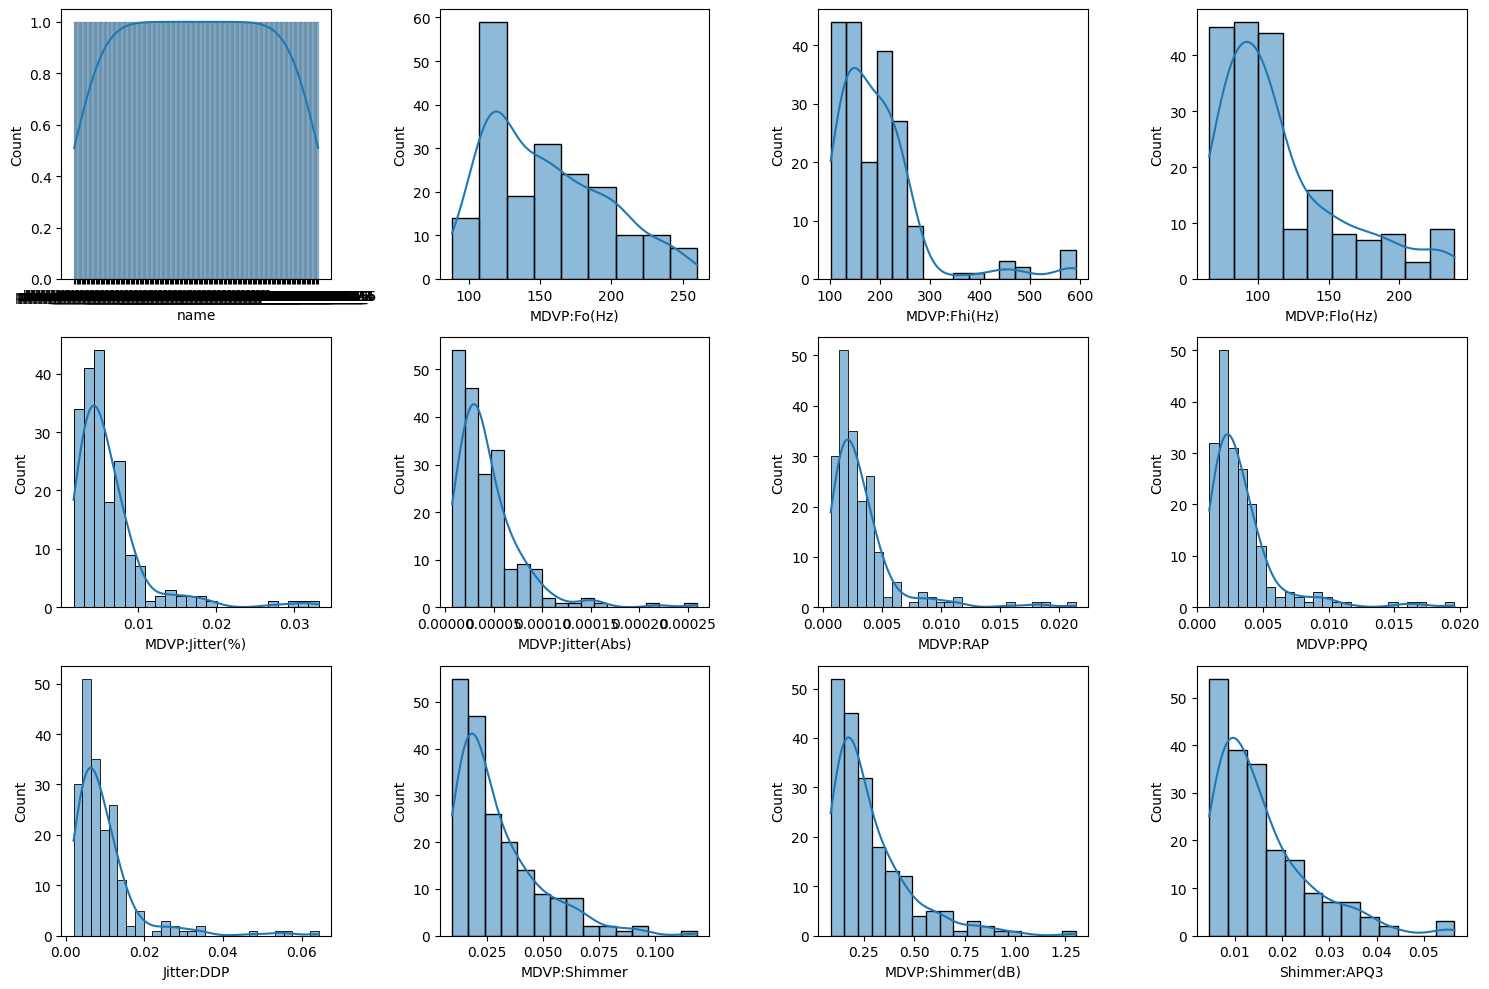

In [10]:
# function to plot different columns at a time
def plot_distributions(df, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
    plt.tight_layout()
    plt.show()

plot_distributions(data, data.columns[:12], 3, 4)

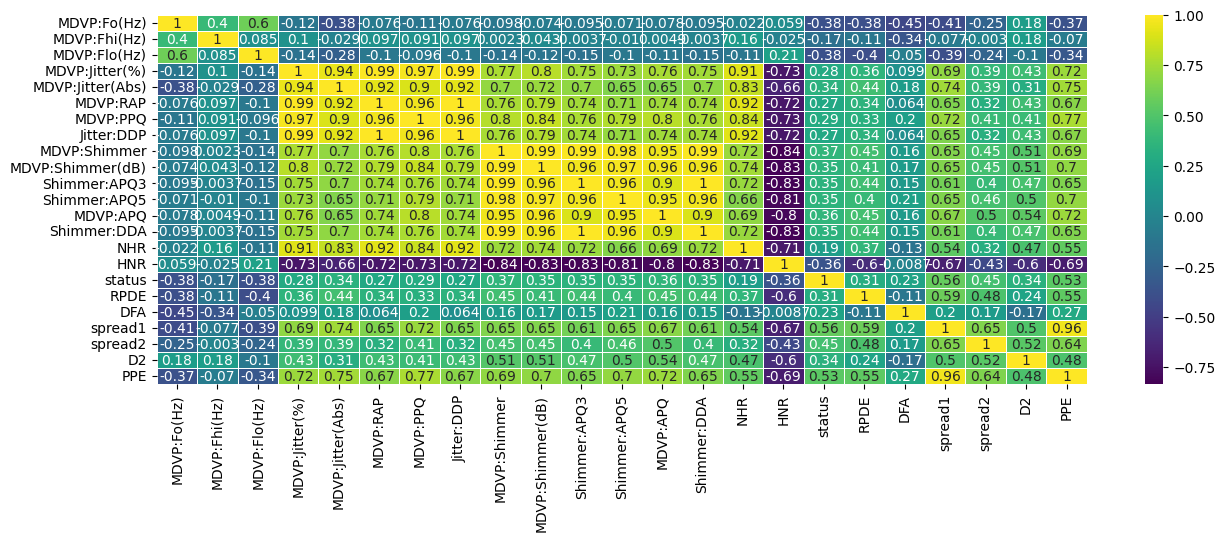

In [12]:
#Get correlation between columns
data_corr = data.corr()

#plot correlation heatmap with the values in each cell.
plt.figure().set_figwidth(15)
ax = sns.heatmap(data_corr, cmap="viridis", xticklabels=1, annot=True, linewidths=.5)

In [14]:
#Initialize scaler and set the target "y" and the features "X"
scaler = MinMaxScaler()
x = data.drop(['status'],axis=1)
y = data['status']


#Split data in train, test and val.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

#Scale the data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(140, 22)
(39, 22)
(16, 22)
(140,)
(39,)
(16,)


# *Diseño y Entrenamiento del Modelo*

## Support Vector Machine Model

In [16]:
# Set parameers gris to evaluate using GridSearch
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'gamma': [0.001, 0.0001]},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svm_model = SVC()
clf = GridSearchCV(svm_model, parameters, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

# First run with SVC (84% of accuracy)
#svm_model = SVC(kernel='rbf', gamma=1, C=10, probability=True)
#svm_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [17]:
#print the best parameters of the gridsearch
print(clf.best_params_.items())
print(clf.best_score_)



dict_items([('C', 1000), ('gamma', 0.001), ('kernel', 'linear')])
0.8642857142857142


In [18]:
svm_model = SVC(kernel='linear', gamma=0.001, C=1, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

In [19]:
y_pred = svm_model.predict(X_test)
y_probas = svm_model.predict_proba(X_test)


test_data_accuracy = accuracy_score(y_test, y_pred)
print(test_data_accuracy)

0.8717948717948718


In [20]:
y_pred_val = svm_model.predict(X_val)
y_proba_val = svm_model.predict_proba(X_val)[:, 1]  # Probability estimates for ROC-AUC and log_loss

# Calculate classification metrics
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_proba_val)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")



Accuracy: 0.8125
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
ROC AUC: 0.8958333333333333


<Axes: title={'center': 'ROC Curves SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

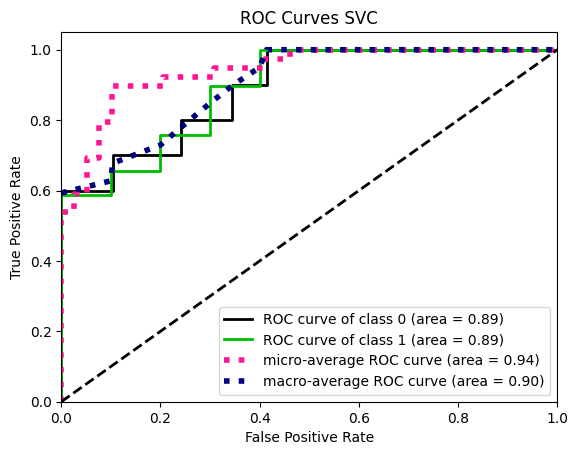

In [26]:
skplt.metrics.plot_roc(y_test, y_probas, title='ROC Curves SVC')

<Axes: title={'center': 'Normalized Confusion Matrix SVC'}, xlabel='Predicted label', ylabel='True label'>

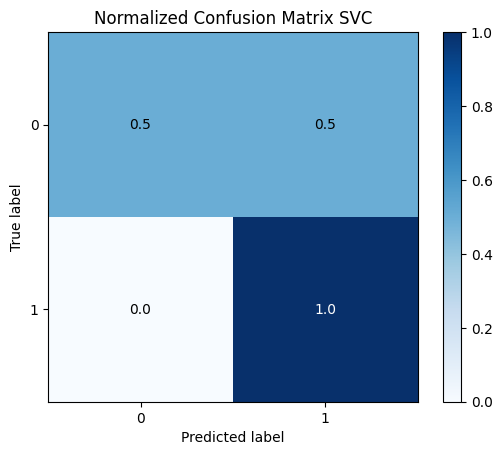

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title='Normalized Confusion Matrix SVC')

<Axes: title={'center': 'Precision-Recall Curve SVC'}, xlabel='Recall', ylabel='Precision'>

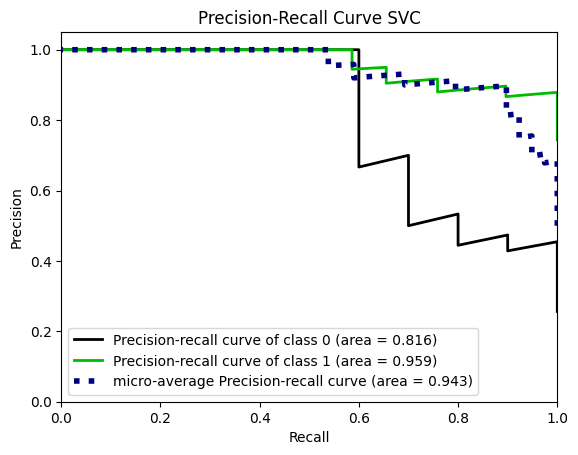

In [23]:
skplt.metrics.plot_precision_recall(y_test, y_probas, title='Precision-Recall Curve SVC')

<Axes: title={'center': 'Cumulative Gains Curve SVC'}, xlabel='Percentage of sample', ylabel='Gain'>

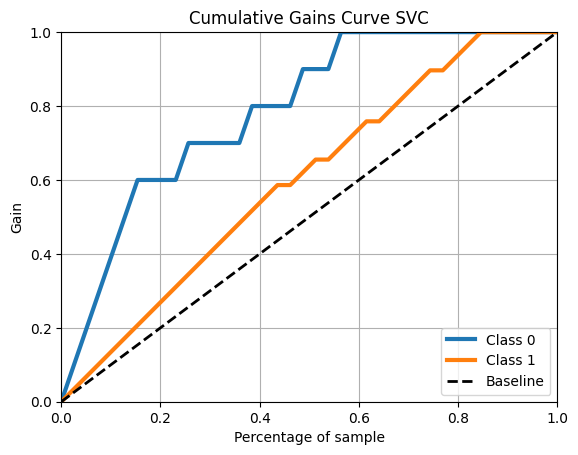

In [24]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas, title='Cumulative Gains Curve SVC')

<Axes: title={'center': 'Lift Curve SVC'}, xlabel='Percentage of sample', ylabel='Lift'>

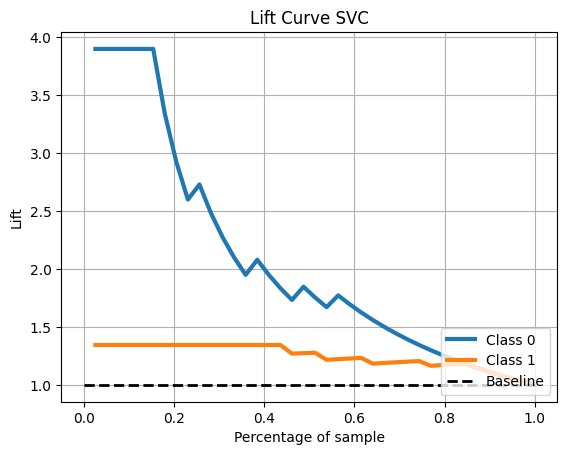

In [25]:
skplt.metrics.plot_lift_curve(y_test, y_probas, title='Lift Curve SVC')

## Neural Network

## Dense Neural Network architechture

In [38]:
#Build neural network model
def denseNeuralNetworkPP(df):
  model = keras.Sequential()
  model.add(layers.Dense(16, activation="relu", kernel_initializer = glorot_uniform(seed=0), input_shape=(df.shape[1],)))
  model.add(layers.Dense(10, activation="relu"))
  model.add(layers.Dense(20, activation="relu"))
  model.add(layers.Dense(10, activation="relu"))
  model.add(layers.Dense(1, activation="sigmoid"))

  return model



In [39]:
#Set the model and compile it with the optimizer, loss and metrics.
model = denseNeuralNetworkPP(X_train)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
#Define early stopping using 'val_loss' as monitor
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)


In [41]:
#Train the model with train set, during 200 epochs as the limit, however the early stopping will stop the training based on the val_loss values.
history = model.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_data=(X_val, y_val), callbacks=[es])


Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 0.6948 - accuracy: 0.3143 - val_loss: 0.6983 - val_accuracy: 0.4375
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.7786 - val_loss: 0.6919 - val_accuracy: 0.6875
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.8357 - val_loss: 0.6883 - val_accuracy: 0.7500
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.8500 - val_loss: 0.6849 - val_accuracy: 0.6875
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6762 - accuracy: 0.8429 - val_loss: 0.6796 - val_accuracy: 0.7500
Epoch 6/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.8643 - val_loss: 0.6727 - val_accuracy: 0.8125
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.8643 - val_loss: 0.6621 - val_accuracy: 0.8125
Epoch 8/200
9/9 [========

In [42]:
y_pred_nn = model.predict(X_test)
#print(y_pred_nn)

2/2 [==============================] - 0s 5ms/step


<Axes: title={'center': 'Precision-Recall Curve NN'}, xlabel='Recall', ylabel='Precision'>

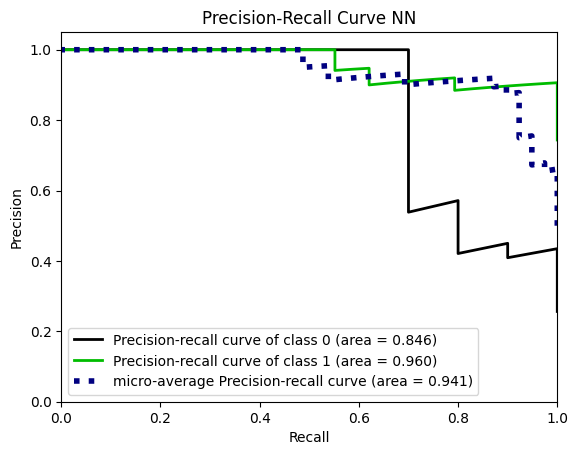

In [52]:
#Get the predictied values, converting the values to clases to feed the methods for the roc curves.
y_pred_nn_classes = np.column_stack((1 - y_pred_nn, y_pred_nn))
y_pred_nn_classes_bin = (y_pred_nn > 0.5).astype(int)

skplt.metrics.plot_precision_recall(y_test, y_pred_nn_classes, title='Precision-Recall Curve NN')

<Axes: title={'center': 'ROC Curves NN'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

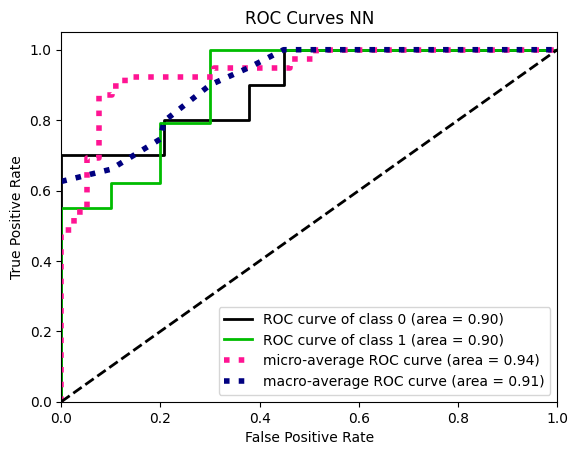

In [61]:
skplt.metrics.plot_roc(y_test, y_pred_nn_classes, title='ROC Curves NN')

<Axes: title={'center': 'Lift Curve NN'}, xlabel='Percentage of sample', ylabel='Lift'>

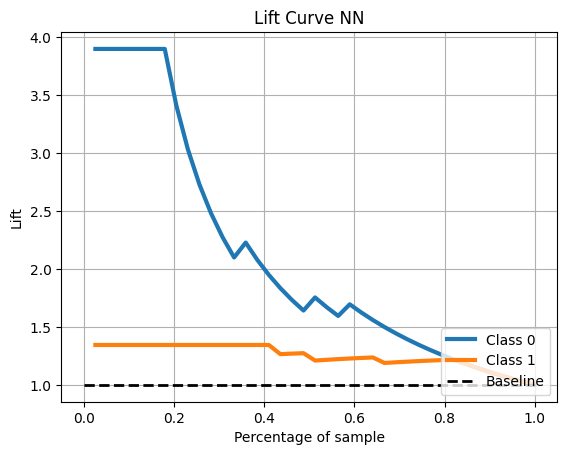

In [54]:
skplt.metrics.plot_lift_curve(y_test, y_pred_nn_classes, title='Lift Curve NN')

<Axes: title={'center': 'Normalized Confusion Matrix NN'}, xlabel='Predicted label', ylabel='True label'>

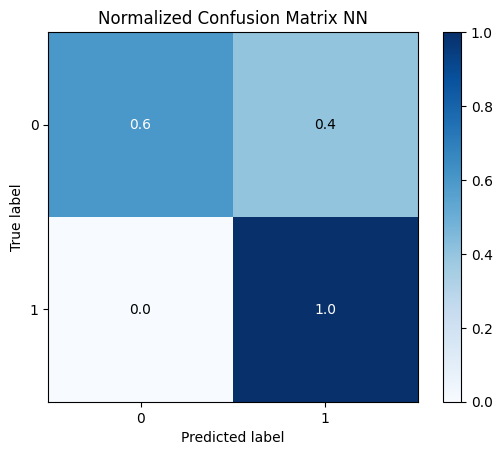

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nn_classes_bin, normalize=True, title='Normalized Confusion Matrix NN')

<Axes: title={'center': 'Cumulative Gains Curve NN'}, xlabel='Percentage of sample', ylabel='Gain'>

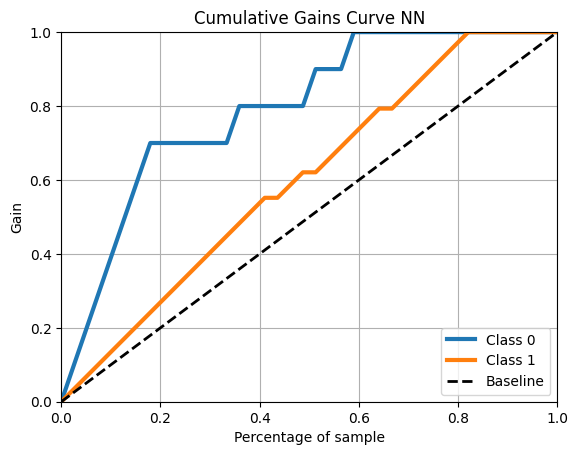

In [56]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_nn_classes, title='Cumulative Gains Curve NN')

2/2 - 0s - loss: 0.2943 - accuracy: 0.8974 - 68ms/epoch - 34ms/step
Test loss: 0.2942856550216675
Test AUC: 0.8974359035491943


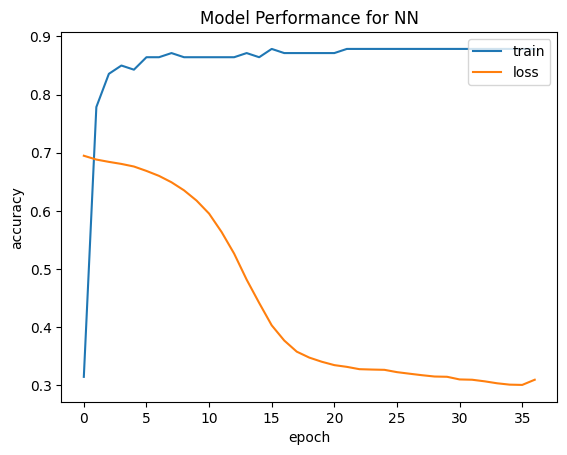

In [58]:
#print accuracy and loss scores during training
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test AUC:", test_scores[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance for NN ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper right')
plt.show()

2/2 - 0s - loss: 0.2943 - accuracy: 0.8974 - 264ms/epoch - 132ms/step
Test loss: 0.2942856550216675
Test AUC: 0.8974359035491943


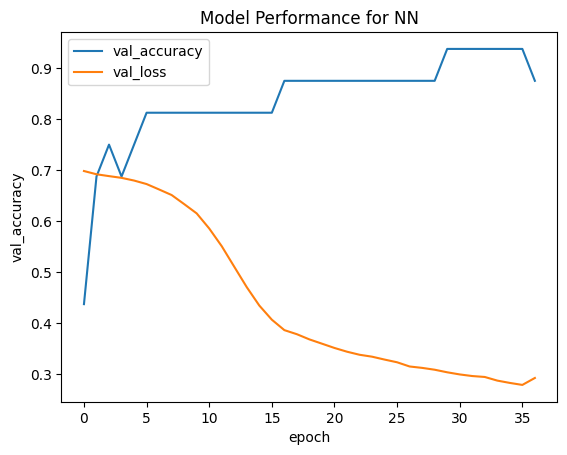

In [59]:
#print val_accuracy and val_loss scores during training
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test AUC:", test_scores[1])

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance for NN')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'val_loss'], loc='upper left')
plt.show()

In [60]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict classes for test set
yhat_classes = (yhat_probs > 0.5).astype(int)  # Assuming binary classification with 0.5 threshold
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.897436
Precision: 0.878788
Recall: 1.000000
F1 score: 0.935484
Cohens kappa: 0.690476
ROC AUC: 0.896552
[[ 6  4]
 [ 0 29]]


# Useful resources

@article{pahuja2021comparative,
  title={A comparative study of existing machine learning approaches for Parkinson's disease detection},
  author={Pahuja, Gunjan and Nagabhushan, TN},
  journal={IETE Journal of Research},
  volume={67},
  number={1},
  pages={4--14},
  year={2021},
  publisher={Taylor \& Francis}
}


https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab

https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py

https://www.labellerr.com/blog/evaluate-the-performance-of-deep-learning-models/
